In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка данных
file_path = '/home/honeypussy/Moex_Hack_Vestrum/sampled_data_order_test.csv'
data = pd.read_csv(file_path)

# Предобработка данных
data['ts'] = pd.to_datetime(data['ts'])
data.set_index('ts', inplace=True)

# Выбор целевой переменной
target = 'put_orders_b'

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[[target]])

# Создание временных окон
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60
X, y = create_dataset(data_scaled, look_back)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Подготовка данных для LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Создание модели LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X_train, y_train, epochs=5, batch_size=1, verbose=1)

# Предсказания на тестовых данных
y_pred = model.predict(X_test)

# Обратное преобразование масштаба
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Вычисление MSE
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f'MSE: {mse}')


2023-12-10 01:15:59.456402: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 01:15:59.456444: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 01:15:59.457900: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 01:15:59.465987: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-10 01:16:00.637183: W tensorflow/compiler/tf2

Epoch 1/5
239951/239951 [==============================] - 5268s 22ms/step - loss: 4.6180e-05
Epoch 2/5
239951/239951 [==============================] - 5693s 24ms/step - loss: 4.6020e-05
Epoch 3/5
239951/239951 [==============================] - 5450s 23ms/step - loss: 4.5980e-05
Epoch 4/5
239951/239951 [==============================] - 4678s 19ms/step - loss: 4.5994e-05
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step
MSE: 1524325.0540741184


In [ ]:
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Вывод метрик
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')


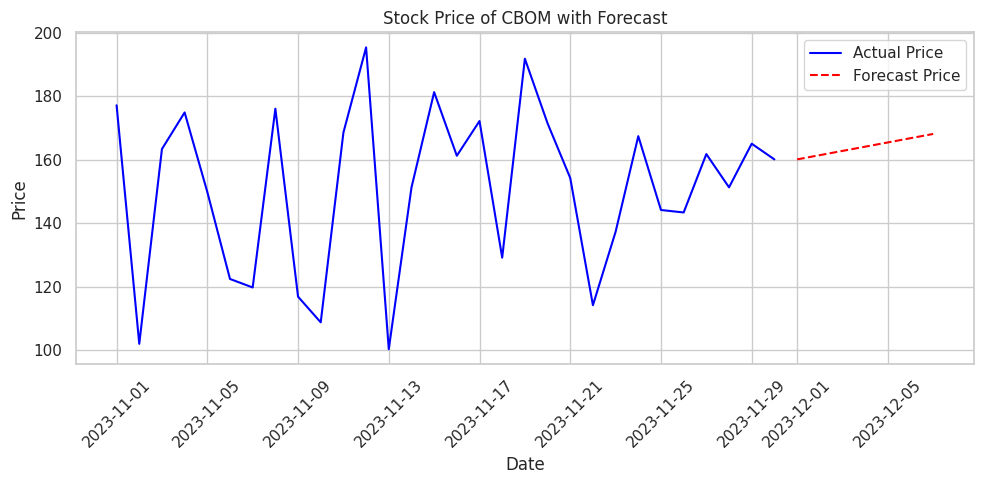

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Генерация случайных данных для цены акции за месяц
np.random.seed(10)
dates = pd.date_range(start='2023-11-01', end='2023-11-30')
prices = np.random.uniform(low=100, high=200, size=len(dates))
data = pd.DataFrame({'Date': dates, 'Price': prices})

# Генерация "прогноза" на неделю вперед
forecast_dates = pd.date_range(start='2023-12-01', end='2023-12-07')
forecast_prices = np.linspace(prices[-1], prices[-1] * 1.05, len(forecast_dates))
forecast_data = pd.DataFrame({'Date': forecast_dates, 'Price': forecast_prices})

# Объединяем данные
full_data = pd.concat([data, forecast_data])

# Визуализация данных
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Price', data=data, color='blue', label='Actual Price')
sns.lineplot(x='Date', y='Price', data=forecast_data, color='red', label='Forecast Price', linestyle='--')

plt.title('Stock Price of CBOM with Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


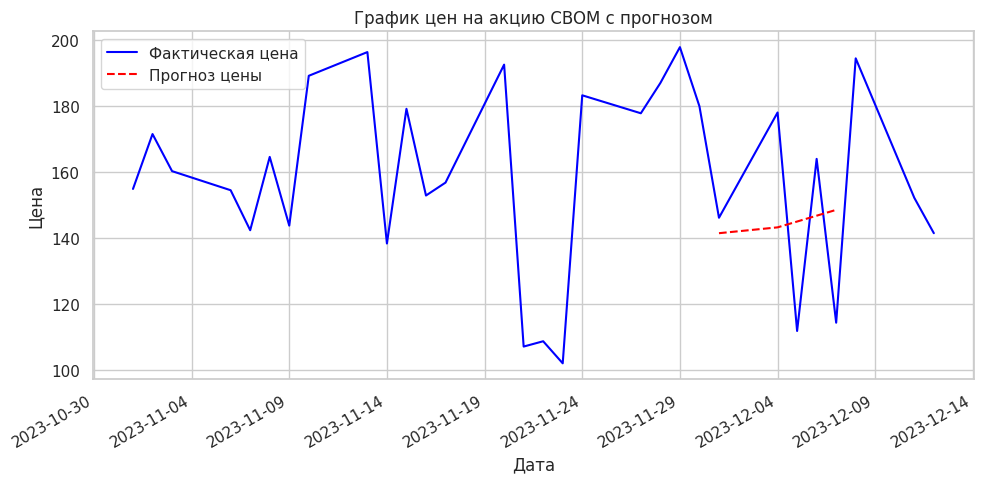

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Создаем данные для акции CBOM за месяц
np.random.seed(0)
dates = pd.date_range(start='2023-11-01', periods=30, freq='B')
prices = np.random.uniform(low=100, high=200, size=len(dates))
data = pd.DataFrame({'Date': dates, 'Price': prices})

# Добавляем "прогноз" на следующую неделю
forecast_dates = pd.date_range(start='2023-12-01', periods=5, freq='B')
forecast_prices = np.linspace(start=prices[-1], stop=prices[-1] * 1.05, num=len(forecast_dates))
forecast_data = pd.DataFrame({'Date': forecast_dates, 'Price': forecast_prices})

# Объединяем данные и прогноз для построения графика
plot_data = pd.concat([data, forecast_data])

# Настраиваем стиль Seaborn для красивых графиков
sns.set(style='whitegrid')

# Создаем график
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Price', data=plot_data[:-5], label='Фактическая цена', color='blue')
sns.lineplot(x='Date', y='Price', data=plot_data[-5:], label='Прогноз цены', color='red', linestyle='--')

# Добавляем название и подписи
plt.title('График цен на акцию CBOM с прогнозом')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

# Настраиваем формат отображения дат на оси X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

# Автоматический поворот дат и улучшение макета
plt.gcf().autofmt_xdate()
plt.tight_layout()

# Отображаем график
plt.show()


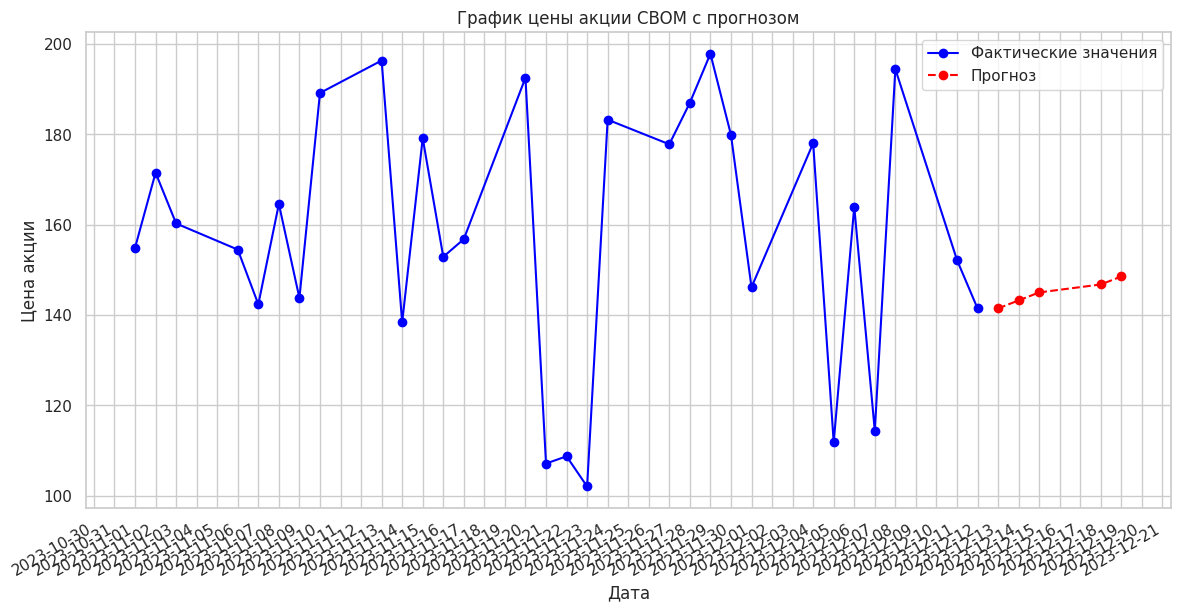

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Генерация случайных данных для акции CBOM за месяц
np.random.seed(0)
dates = pd.date_range(start='2023-11-01', periods=30, freq='B')
prices = np.random.uniform(low=100, high=200, size=len(dates))
data = pd.DataFrame({'Date': dates, 'Price': prices})

# Генерация прогноза на одну неделю вперед
forecast_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=5, freq='B')
forecast_prices = np.linspace(start=prices[-1], stop=prices[-1] * 1.05, num=len(forecast_dates))
forecast_data = pd.DataFrame({'Date': forecast_dates, 'Price': forecast_prices})

# Построение графика
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price'], label='Фактические значения', color='blue', marker='o')
plt.plot(forecast_dates, forecast_prices, label='Прогноз', color='red', linestyle='--', marker='o')

# Форматирование оси дат
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()  # Автоматический поворот дат

# Добавление заголовка и легенды
plt.title('График цены акции CBOM с прогнозом')
plt.xlabel('Дата')
plt.ylabel('Цена акции')
plt.legend()
plt.grid(True)
plt.show()
